In [1]:
# -*- coding: UTF-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import naive_bayes
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [2]:
#读取数据
def get_data():
	data=pd.read_excel('评论数据.xls')
	return data.loc[:,['hotelid','content','rating']]

In [3]:
#建立中文停用词表 返回list格式
def get_stop_words():
	chinese_stop_words=[]
	for line in open("chinese_stop_words.txt",'r'):
		chinese_stop_words.append(line[:-1])
	return chinese_stop_words

In [4]:
#数据预处理（分词）
def get_comment_keywords_counts(comment_data,chinese_stop_words):
    seg_words_list = []
    for comment in comment_data:
        seg_word=list(jieba.cut(comment))
        result= ''
        for word in seg_word:  
            if word not in chinese_stop_words:
                if word != '\t':
                    result+=word+' '
        seg_words_list.append(result)
    return seg_words_list

In [5]:
data=get_data()
data=data.dropna()

In [6]:
chinese_stop_words=get_stop_words()

In [7]:
x=data['content']

In [8]:
x=get_comment_keywords_counts(x,chinese_stop_words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.661 seconds.
Prefix dict has been built succesfully.


In [9]:
def test(x,ratings):
    alphas = np.arange(0,5,0.05)
    test_scores = []
    for alpha in alphas:
        y=[]
        for rating in ratings:
            if rating > alpha:
                y.append(1)
            else:
                y.append(0)
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
        count_vect=CountVectorizer()
        x_train=count_vect.fit_transform(x_train)
        tfidf_transformer=TfidfTransformer().fit(x_train)
        x_train=tfidf_transformer.transform(x_train)
        x_test=count_vect.transform(x_test)
        x_test=tfidf_transformer.transform(x_test)
        cls = naive_bayes.MultinomialNB().fit(x_train, y_train)
        test_scores.append(cls.score(x_test, y_test))
    return test_scores

In [10]:
test_scores= test(x,data['rating'])

D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
D:\Program Files\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encoun

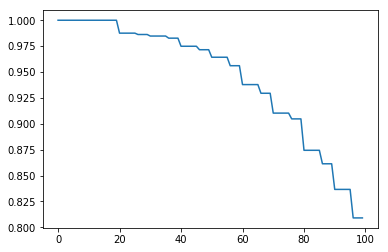

In [11]:
plt.plot(test_scores)
plt.show()